# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
import pandas as pd
from palmerpenguins import load_penguins

penguins = load_penguins()
penguins.dropna(subset=['bill_depth_mm'], inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

X = penguins.drop('bill_depth_mm', axis=1)
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

def build_pipeline(num_vars, cat_vars):
    num_transform = Pipeline([
        ("impute", SimpleImputer(strategy="mean")),
        ("scalar", StandardScaler())
    ])
    cat_transform = Pipeline([
        ("impute", SimpleImputer(strategy="most_frequent")),
        ("dummy", OneHotEncoder())
    ])

    ct = ColumnTransformer([
        ('num', num_transform, num_vars),
        ("cat", cat_transform, cat_vars)
    ])

    pipeline = Pipeline([
        ("preprocessor", ct),
        ("regressor", LinearRegression())
    ])

    return pipeline

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [6]:
num_vars = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'year']
cat_vars = ['species', 'island', 'sex']
pipeline1 = build_pipeline(num_vars, cat_vars)
pipeline1.fit(X_train, y_train)

num_vars = ['bill_length_mm', 'flipper_length_mm', 'body_mass_g']
cat_vars = ['species', 'island', 'sex']
pipeline2 = build_pipeline(num_vars, cat_vars)
pipeline2.fit(X_train, y_train)

num_vars = ['bill_length_mm', 'flipper_length_mm']
cat_vars = ['species', 'island', 'sex']
pipeline3 = build_pipeline(num_vars, cat_vars)
pipeline3.fit(X_train, y_train)

num_vars = ['bill_length_mm', 'flipper_length_mm']
cat_vars = ['species', 'sex']
pipeline4 = build_pipeline(num_vars, cat_vars)
pipeline4.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('scalar',
                                                                   StandardScaler())]),
                                                  ['bill_length_mm',
                                                   'flipper_length_mm']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('dummy',
                                                                   OneHotEncoder())]),
                                                  ['species', 'sex'])])),
                ('regressor', LinearRegression())])

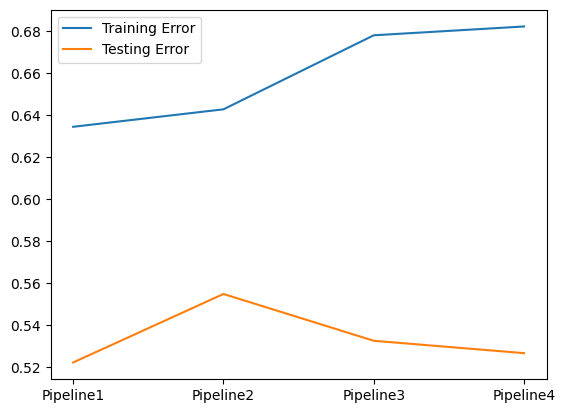

In [14]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

train_error_1 = mean_squared_error(y_train, pipeline1.predict(X_train))
test_error_1 = mean_squared_error(y_test, pipeline1.predict(X_test))

train_error_2 = mean_squared_error(y_train, pipeline2.predict(X_train))
test_error_2 = mean_squared_error(y_test, pipeline2.predict(X_test))

train_error_3 = mean_squared_error(y_train, pipeline3.predict(X_train))
test_error_3 = mean_squared_error(y_test, pipeline3.predict(X_test))

train_error_4 = mean_squared_error(y_train, pipeline4.predict(X_train))
test_error_4 = mean_squared_error(y_test, pipeline4.predict(X_test))

train_errors = [train_error_1, train_error_2, train_error_3, train_error_4]
test_errors = [test_error_1, test_error_2, test_error_3, test_error_4]

x = range(1, 5)
plt.plot(x, train_errors, label='Training Error')
plt.plot(x, test_errors, label='Testing Error')
plt.xticks(ticks=x, labels=['Pipeline1', 'Pipeline2', 'Pipeline3', 'Pipeline4'])
plt.legend()
plt.show()


In [18]:
import numpy as np

print(f"Lowest train error: Model {np.argmin(train_errors) + 1} - {min(train_errors)}")
print(f"Lowest test error: Model {np.argmin(test_errors) + 1} - {min(test_errors)}")

Lowest train error: Model 1 - 0.6345666079098609
Lowest test error: Model 1 - 0.5222156775484128
